In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pf_data = pd.read_csv('Markowitz_Data.csv',index_col='Date')
pf_data.tail()

,PG,^GSPC
Date,,
2017-03-20,91.220001,2373.469971
2017-03-21,91.190002,2344.020020
2017-03-22,90.989998,2348.449951
2017-03-23,90.769997,2345.959961
2017-03-24,90.570000,2343.979980


<AxesSubplot:xlabel='Date'>

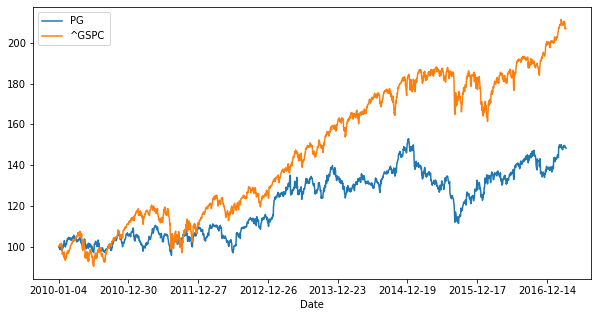

In [3]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5)) #Normalize to 100 and plot

### Obtain the Efficient frontier (Markowitz)

In [5]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [6]:
log_returns.mean()*250

PG       0.054082
^GSPC    0.099971
dtype: float64

In [7]:
log_returns.cov()*250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [8]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [11]:
num_assets = len(pf_data.columns)

2

Next, we are considering 1000 different combinations of the same assets, the objective is to compare the two assets and see which one is efficient

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets) #Create two random weights between 0 and 1
    weights /= np.sum(weights) #The same that w = w/sum(w), because we want the sum will be equal to 100%
    pfolio_returns.append( np.sum( weights * log_returns.mean() ) * 250 ) #Expected Portfolio Variance
    pfolio_volatilities.append( np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))) ) #Expected Portfolio Volatility

#Convert the 2 lists into numpy arrays
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.08588733, 0.07853447, 0.08489115, 0.0918273 , 0.07723817,
        0.08043502, 0.05893513, 0.07785236, 0.07706955, 0.07752984,
        0.09339718, 0.09248446, 0.09951718, 0.07968303, 0.08102386,
        0.0924822 , 0.07735669, 0.05655969, 0.0727624 , 0.07795191,
        0.09132857, 0.06719944, 0.06775351, 0.08974207, 0.05946259,
        0.0758923 , 0.07359029, 0.07108808, 0.06374769, 0.07137245,
        0.07258061, 0.07986425, 0.08653217, 0.07381778, 0.06293293,
        0.08597254, 0.09352006, 0.07947577, 0.06157347, 0.0707248 ,
        0.06795815, 0.06972432, 0.07348578, 0.08353427, 0.086426  ,
        0.09716944, 0.05726195, 0.07458173, 0.08772793, 0.08890631,
        0.08260255, 0.07799066, 0.09127736, 0.08503827, 0.08296079,
        0.08053919, 0.06979649, 0.07537095, 0.05726803, 0.06650848,
        0.0848169 , 0.07034022, 0.07728374, 0.0908868 , 0.08177666,
        0.06502122, 0.08882636, 0.076358  , 0.09438854, 0.08496718,
        0.0864681 , 0.06952947, 0.09318295, 0.08

In [20]:
portfolios = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

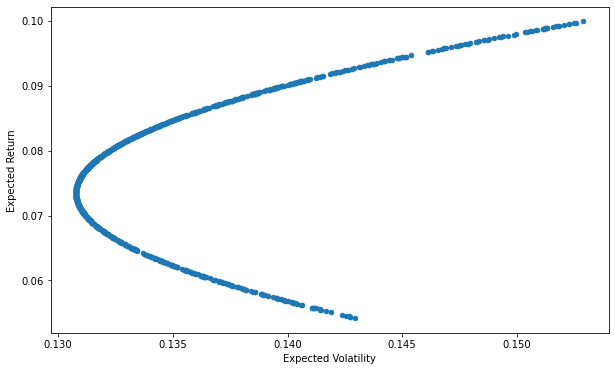

In [21]:
portfolios.plot(x='Volatility', y='Return',kind='scatter',figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')